In [308]:
using Revise
using Test
using Plots
using StatsBase

In [2]:
includet("tvp-var.jl")

In [473]:
coef = generate_coeffs([0.2 0.4], [1. 1.], [0.001 0.001], [0.01 0.02], 100)

round.(coef, digits=4)

100×1×2 Array{Float64, 3}:
[:, :, 1] =
 0.1929
 0.2031
 0.2119
 0.2317
 0.221
 0.2015
 0.1957
 0.199
 0.2152
 0.214
 ⋮
 0.2143
 0.2162
 0.2204
 0.2147
 0.2175
 0.2087
 0.2165
 0.2224
 0.2054

[:, :, 2] =
 0.4108
 0.397
 0.3729
 0.3956
 0.3897
 0.3745
 0.3804
 0.3727
 0.3921
 0.3708
 ⋮
 0.4872
 0.5018
 0.5239
 0.5156
 0.5368
 0.5493
 0.5445
 0.5746
 0.5705

In [426]:
round.(rand(Uniform(-1,1),2), digits=2)

2-element Vector{Float64}:
 -0.09
 -0.57

In [476]:
coef_vol = mean(diff(coef[:,1,:], dims=1), dims=1)

1×2 Matrix{Float64}:
 0.000126244  0.00161303

In [427]:
#init params
B0 = [0.6, 0.4]
P0 = diagm([.05, .03])
ν = diagm([.015, .01])
Y = .035
X = [0.2, 0.1]'
σ = 0.04


S = measurement_cov(X, P0, σ)
display(S)
K = k_gain(X,ν, S)
display(K)
res = residuals(Y, X, B0)
display(res)
states = update_state(B0, K, res)
display(states)
filtered_cov = update_cov(P0, K, X) 
display(filtered_cov)
#[0. 0.] + (K * res)' 


0.042300000000000004

2-element Vector{Float64}:
 0.07092198581560283
 0.02364066193853428

-0.125

2-element Vector{Float64}:
 0.5911347517730496
 0.39704491725768326

2×2 Matrix{Float64}:
  0.0492908    -0.000212766
 -0.000236407   0.0299291

In [428]:
B0 = [0.6, 0.4]
P0 = diagm([.05, .03])
ν = diagm([.015, .01])
Y = .035
X = [0.2, 0.1]
σ = 0.04

res = kalman_step2(B0,P0, Y, X, σ, ν)

display(round.(res[1], digits=4))
display(round.(res[2], digits=4))

2-element Vector{Float64}:
 0.5622
 0.3884

2×2 Matrix{Float64}:
  0.0611  -0.0012
 -0.0012   0.0396

In [479]:
X1 = [.54 .92]


X_test = round.(sample(X1, coef, .04, 80)', digits=2)[2:end,:]

80×2 Matrix{Float64}:
  0.11   0.2
  0.0    0.07
  0.01   0.05
 -0.07   0.05
 -0.1   -0.0
 -0.05  -0.01
 -0.04   0.0
  0.01   0.0
 -0.02  -0.04
  0.01  -0.05
  ⋮     
 -0.02  -0.02
 -0.04  -0.01
 -0.05  -0.03
  0.0   -0.01
 -0.0   -0.03
 -0.0   -0.1
  0.03  -0.0
 -0.0   -0.06
 -0.01   0.04

In [480]:
Y = X_test[2:end,1]

79-element Vector{Float64}:
  0.0
  0.01
 -0.07
 -0.1
 -0.05
 -0.04
  0.01
 -0.02
  0.01
  0.04
  ⋮
 -0.02
 -0.04
 -0.05
  0.0
 -0.0
 -0.0
  0.03
 -0.0
 -0.01

In [431]:
display(X_test[1, :])
display(Y[1])


2-element Vector{Float64}:
 0.12
 0.11

-0.0

In [481]:
B0 = [0.2, 0.4]
P0 = diagm([.00, .00])
ν = diagm(vec(coef_vol))
σ = 0.04
res = kalmanFilter2(X_test[1:end-1,:], Y, B0, P0, σ, ν)

display(round.(res[1], digits=4))
display("cov")
display(round.(res[2], digits=4))

80×2 Matrix{Float64}:
 0.2     0.4
 0.2     0.3992
 0.2     0.3991
 0.2     0.3985
 0.2     0.3977
 0.2001  0.3977
 0.2001  0.3977
 0.2001  0.3977
 0.2001  0.3977
 0.2001  0.3973
 ⋮       
 0.2018  0.2982
 0.202   0.2997
 0.2023  0.3007
 0.2021  0.2992
 0.2021  0.2992
 0.2021  0.2984
 0.2021  0.2825
 0.2021  0.2825
 0.2021  0.2814

"cov"

80×2×2 Array{Float64, 3}:
[:, :, 1] =
 0.0      0.0
 0.0001  -0.0
 0.0003  -0.0
 0.0004  -0.0
 0.0005   0.0
 0.0006   0.0
 0.0008   0.0
 0.0009   0.0
 0.001    0.0
 0.0011  -0.0
 ⋮       
 0.0089   0.0
 0.009    0.0
 0.0091   0.0
 0.0092  -0.0
 0.0094  -0.0
 0.0095  -0.0
 0.0096  -0.0
 0.0098  -0.0
 0.0099  -0.0

[:, :, 2] =
  0.0  0.0
 -0.0  0.0016
 -0.0  0.0032
 -0.0  0.0048
  0.0  0.0064
  0.0  0.0081
  0.0  0.0097
  0.0  0.0113
  0.0  0.0129
 -0.0  0.0145
  ⋮    
  0.0  0.1005
  0.0  0.102
  0.0  0.1036
 -0.0  0.1049
 -0.0  0.1065
 -0.0  0.1079
 -0.0  0.1066
 -0.0  0.1082
 -0.0  0.1087

In [468]:
s = smooth_state([0.28, 0.09], [0.2, .05], diagm([0.04, 0.08]), diagm([0.01, 0.02]))

round.(s, digits=4)

2-element Vector{Float64}:
 0.264
 0.082

In [434]:
c = smooth_cov(diagm([0.04, 0.08]), diagm([0.01, 0.02]))

2×2 Matrix{Float64}:
 0.008  0.0
 0.0    0.016

In [482]:
S_filtered = res[1]
P_filtered = res[2]

sampled = simulation_smoother(S_filtered, P_filtered, ν)

round.(sampled, digits=4)

PosDefException: PosDefException: matrix is not Hermitian; Cholesky factorization failed.

In [451]:
n_draws = 10_000

coeff_post = zeros(n_draws,80, 2)

for d in 1:n_draws
    coeff_post[d, :, :] = carter_kohn(X_test[1:end-1,:], Y, B0, P0, σ, ν)
end

In [452]:
estimated = mean(coeff_post, dims=1)

1×80×2 Array{Float64, 3}:
[:, :, 1] =
 0.2  0.197435  0.197257  0.196448  0.196555  …  0.145925  0.144299  0.144983

[:, :, 2] =
 0.4  0.381324  0.369361  0.362037  …  0.0689991  0.0684953  0.0669131

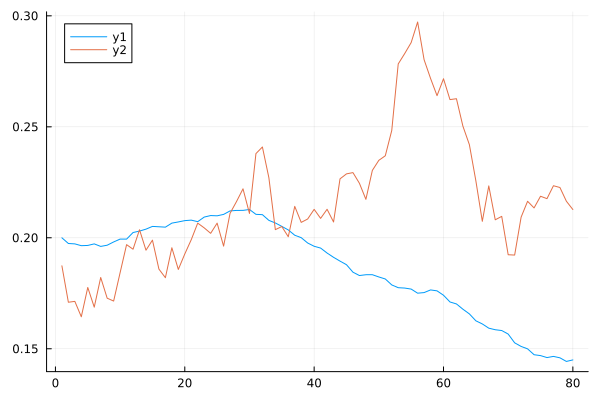

In [453]:
plot(estimated[1,:,1])
plot!(coef[:,1,1])

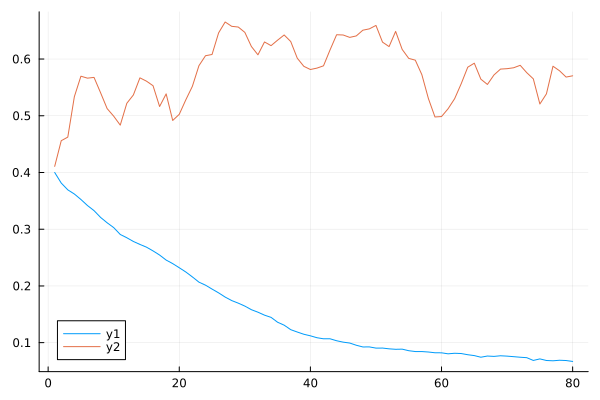

In [454]:
plot(estimated[1,:,2])
plot!(coef[:,1,2])

In [1]:
using StatsBase, LinearAlgebra

sig = [ 0.05, 0.07, 9.09 ]
corr = [1. 0.3 0.4; 0.3 1 0.2; 0.4 0.2 1.]
cov = cor2cov(corr, sig)

3×3 Matrix{Float64}:
 0.0025   0.00105   0.1818
 0.00105  0.0049    0.12726
 0.1818   0.12726  82.6281

In [7]:
#chol = cholesky(cov).L

B = lu(cov).L
D = diag(cov)

inv(B) * D * inv(B)'


DimensionMismatch: DimensionMismatch: A has dimensions (3,1) but B has dimensions (3,3)

3×3 UnitLowerTriangular{Float64, LowerTriangular{Float64, Matrix{Float64}}}:
 1.0     ⋅         ⋅ 
 0.021  1.0        ⋅ 
 3.636  0.762313  1.0